In [123]:
from math import sqrt
import numpy as np
import pandas as pd
from cvxopt import matrix
from cvxopt.blas import dot
from cvxopt.solvers import qp
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm

In [98]:


poly = PolynomialFeatures(interaction_only=False)
X.shape

(7, 2)

In [99]:
Xt=poly.fit_transform(X)

In [100]:
X = np.array([[1, 0], [0, 1], [0, -1], [-1, 0], [0, 2], [0, -2], [-2, 0]])
Y = np.array([-1, -1, -1, 1, 1, 1, 1])

Xt

array([[ 1.,  1.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  0., -1.,  0., -0.,  1.],
       [ 1., -1.,  0.,  1., -0.,  0.],
       [ 1.,  0.,  2.,  0.,  0.,  4.],
       [ 1.,  0., -2.,  0., -0.,  4.],
       [ 1., -2.,  0.,  4., -0.,  0.]])

In [101]:
Xt2 = Xt@Xt.T
Xt2

array([[ 3.,  1.,  1.,  1.,  1.,  1.,  3.],
       [ 1.,  3.,  1.,  1.,  7.,  3.,  1.],
       [ 1.,  1.,  3.,  1.,  3.,  7.,  1.],
       [ 1.,  1.,  1.,  3.,  1.,  1.,  7.],
       [ 1.,  7.,  3.,  1., 21., 13.,  1.],
       [ 1.,  3.,  7.,  1., 13., 21.,  1.],
       [ 3.,  1.,  1.,  7.,  1.,  1., 21.]])

In [102]:
A = matrix(Y,(1,7),'d')
print(A)

[-1.00e+00 -1.00e+00 -1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00]



In [103]:
b =matrix(0,(1,1),'d')
print(b)

[ 0.00e+00]



In [104]:
h = matrix(0,(7,1),'d')
print(h)

[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]



In [105]:
#G = matrix(np.vstack([np.eye(7), Y,-Y]),(9,7),'d')#
G = matrix(-np.eye(7),(7,7),'d')
print(G)

[-1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00]



In [106]:
p = matrix(-1,(7,1),'d')
print(p)

[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]



In [107]:
YY = Y.reshape(7,1)@Y.reshape(1,7)
YY

array([[ 1,  1,  1, -1, -1, -1, -1],
       [ 1,  1,  1, -1, -1, -1, -1],
       [ 1,  1,  1, -1, -1, -1, -1],
       [-1, -1, -1,  1,  1,  1,  1],
       [-1, -1, -1,  1,  1,  1,  1],
       [-1, -1, -1,  1,  1,  1,  1],
       [-1, -1, -1,  1,  1,  1,  1]])

In [108]:
XX = Xt2
XX

array([[ 3.,  1.,  1.,  1.,  1.,  1.,  3.],
       [ 1.,  3.,  1.,  1.,  7.,  3.,  1.],
       [ 1.,  1.,  3.,  1.,  3.,  7.,  1.],
       [ 1.,  1.,  1.,  3.,  1.,  1.,  7.],
       [ 1.,  7.,  3.,  1., 21., 13.,  1.],
       [ 1.,  3.,  7.,  1., 13., 21.,  1.],
       [ 3.,  1.,  1.,  7.,  1.,  1., 21.]])

In [109]:
QQ=(XX*YY).astype(float)




Q1 = matrix(QQ,(7,7),'d')
print(Q1)

[ 3.00e+00  1.00e+00  1.00e+00 -1.00e+00 -1.00e+00 -1.00e+00 -3.00e+00]
[ 1.00e+00  3.00e+00  1.00e+00 -1.00e+00 -7.00e+00 -3.00e+00 -1.00e+00]
[ 1.00e+00  1.00e+00  3.00e+00 -1.00e+00 -3.00e+00 -7.00e+00 -1.00e+00]
[-1.00e+00 -1.00e+00 -1.00e+00  3.00e+00  1.00e+00  1.00e+00  7.00e+00]
[-1.00e+00 -7.00e+00 -3.00e+00  1.00e+00  2.10e+01  1.30e+01  1.00e+00]
[-1.00e+00 -3.00e+00 -7.00e+00  1.00e+00  1.30e+01  2.10e+01  1.00e+00]
[-3.00e+00 -1.00e+00 -1.00e+00  7.00e+00  1.00e+00  1.00e+00  2.10e+01]



In [110]:
sol=qp(Q1,p,G, h,A,b)

     pcost       dcost       gap    pres   dres
 0: -2.1712e+00 -5.0654e+00  2e+01  3e+00  2e+00
 1: -3.8978e+00 -5.7620e+00  6e+00  1e+00  7e-01
 2: -1.7493e+00 -2.7818e+00  1e+00  5e-16  6e-15
 3: -1.9825e+00 -2.0130e+00  3e-02  4e-16  1e-15
 4: -1.9997e+00 -2.0001e+00  4e-04  7e-16  2e-15
 5: -2.0000e+00 -2.0000e+00  4e-06  3e-16  1e-15
 6: -2.0000e+00 -2.0000e+00  4e-08  3e-16  1e-15
Optimal solution found.


In [111]:
alpha=np.array(sol['x'])
ay = alpha*(Y.reshape(7,1))
a = [i[0] for i in ay]
a

[-3.7566864974734134e-08,
 -0.9999999782848092,
 -0.9999999766266618,
 1.3333333357187318,
 0.3333333285328226,
 0.333333327703749,
 5.230326690336455e-10]

In [113]:
w = 0
for i in range(len(a)):

    w = w +Xt[i]*a[i]
w

array([ 5.18168890e-17, -1.33333337e+00, -2.22044605e-16,  1.33333330e+00,
        0.00000000e+00,  6.66666670e-01])

In [114]:
Y[1] -Xt[1]@w

-1.6666666700348152

array([1., 0., 1., 0., 0., 1.])

In [147]:
from svm import*

In [148]:
from svmutil import *

In [149]:


prob = svm_problem([1,-1],[[1,0,1],[-1,0,-1]])#两个参数，第一个参数是分类的类型，第二个参数是输入数据，其中1对应[1,0,1]  
param = svm_parameter()#与书中不同，这是新版本的改进，用下面的方法来指定使用的核方法  
param.kernel_type = LINEAR#跟多内容参见博客  
param.C = 10  
model = svm_train(prob, param)#训练  
svm_predict([1],[[1,1,1]],model)#第一个参数我是自己预测的，第二个参数是需要判断的数据，第三个就是训练模型  

Accuracy = 100% (1/1) (classification)


([1.0], (100.0, 0.0, nan), [[1.0]])

In [16]:
prob1 = svm_problem(Y,X)
X

array([[ 1,  0],
       [ 0,  1],
       [ 0, -1],
       [-1,  0],
       [ 0,  2],
       [ 0, -2],
       [-2,  0]])

In [17]:
param = svm_parameter()

In [18]:
param.kernel_type = POLY

In [19]:
param.gamma=1

In [20]:
param.degree=2
param.coef0=1

In [21]:
param.C = 1e16
param.shrinking=1
param.cache_size=100

In [22]:
model = svm_train(prob1, param)

In [23]:
print(param)

svm_type: 0
 kernel_type: 1
 degree: 2
 gamma: 1.0
 coef0: 1.0
 cache_size: 100.0
 eps: 0.001
 C: 1e+16
 nr_weight: 0
 weight_label: <ctypes.wintypes.LP_c_long object at 0x000001ADD449EC48>
 weight: <svm.LP_c_double object at 0x000001ADD449EBC8>
 nu: 0.5
 p: 0.1
 shrinking: 1
 probability: 0
 cross_validation: False
 nr_fold: 0
 print_func: <CFunctionType object at 0x000001ADD6012458>


In [24]:
support_vectors = model.get_SV()

In [25]:
support_vectors

[{1: -1.0, -1: 0.0},
 {2: 2.0, -1: 0.0},
 {2: -2.0, -1: 0.0},
 {2: 1.0, -1: 0.0},
 {2: -1.0, -1: 0.0}]

In [37]:
L = model.get_sv_coef()
len(L)

5

In [40]:
[i[0] for i in L]

[0.8887164347987063,
 0.15028522296992985,
 0.36817043235512975,
 -0.4857048695492317,
 -0.9214672205745343]

In [625]:
model.get_labels()

[1, -1]

In [626]:
model.get_sv_indices()

[4, 5, 6, 2, 3]

In [665]:
dir(model.SV)

['__bool__',
 '__class__',
 '__ctypes_from_outparam__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_b_base_',
 '_b_needsfree_',
 '_objects',
 '_type_',
 'contents']

In [673]:
svm_predict(Y,X,model)

Accuracy = 100% (7/7) (classification)


([-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0],
 (100.0, 0.0, 1.0),
 [[-2.5552473580308748],
  [-0.9998965275458906],
  [-0.999864256565502],
  [0.9996183811639503],
  [1.0000389304933324],
  [1.0001034724541118],
  [5.443200555157483]])

In [675]:
sum([(0.8887164347987063,),
 (0.15028522296992985,),
 (0.36817043235512975,),
 (-0.4857048695492317,),
 (-0.9214672205745343,)])

TypeError: unsupported operand type(s) for +: 'int' and 'tuple'

In [75]:
from sklearn.svm import SVC

In [76]:
clf = SVC(C=1e20, kernel='poly', degree=2, gamma=1, coef0=1, shrinking=False)
clf.fit(X, Y)

SVC(C=1e+20, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=2, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False)

In [79]:
print('支撑向量对应下标：',clf.support_, '\n对应的alpha*y：', clf.dual_coef_,'\n b: ',clf.intercept_)

支撑向量对应下标： [1 2 3 4 5] 
对应的alpha*y： [[-0.64491963 -0.76220325  0.88870349  0.22988879  0.2885306 ]] 
 b:  [-1.66633141]


In [80]:
import math

In [81]:
Xtrans = np.zeros((7, 5))
Xtrans[:, 0] = np.ones((7,))
Xtrans[:, 1] = math.sqrt(2)*X[:, 0]
Xtrans[:, 2] = math.sqrt(2)*X[:, 1]
Xtrans[:, 3] = X[:, 0]**2
Xtrans[:, 4] = X[:, 1]**2

In [82]:
Xtrans

array([[ 1.        ,  1.41421356,  0.        ,  1.        ,  0.        ],
       [ 1.        ,  0.        ,  1.41421356,  0.        ,  1.        ],
       [ 1.        ,  0.        , -1.41421356,  0.        ,  1.        ],
       [ 1.        , -1.41421356,  0.        ,  1.        ,  0.        ],
       [ 1.        ,  0.        ,  2.82842712,  0.        ,  4.        ],
       [ 1.        ,  0.        , -2.82842712,  0.        ,  4.        ],
       [ 1.        , -2.82842712,  0.        ,  4.        ,  0.        ]])

In [115]:
clf = SVC(C=1e20, kernel='poly', degree=2, gamma=1, coef0=1, shrinking=False)
clf.fit(X, Y)

SVC(C=1e+20, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=2, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False)

In [120]:
clf.intercept_

array([-1.66633141])

In [121]:
data_train = pd.read_csv("data_train.csv")
data_test = pd.read_csv("data_test.csv")
data_train["Y"] = (data_train["digit"] == 2) * 2 - 1
data_train["X_1"] = data_train["intensity"]
data_train["X_2"] = data_train["symmetry"]
X = data_train[["X_1", "X_2"]].values
Y = data_train["Y"].values


In [144]:

test = svm.SVC(C = 1000, kernel = "linear")
test.fit(X, Y)
print(test.coef_)
test.coef_

[[-0.12696591  0.00060979]]


array([[-0.12696591,  0.00060979]])

In [139]:
data_train = pd.read_csv("data_train.csv")
data_test = pd.read_csv("data_test.csv")
Y = (data_train["digit"] == 4) * 2 - 1
data_train["X_1"] = data_train["intensity"]
data_train["X_2"] = data_train["symmetry"]
X = data_train[["X_1", "X_2"]].values
Y = Y.values
Ytmp = Y.copy()
clf = SVC(C = 1, kernel = "linear", gamma=100, shrinking=False)
result = clf.fit(X,Ytmp)

Y_hat = result.predict(X)
E_in = sum((Y_hat != Ytmp) * 1) / len(Y)
print("For C = ", i)
print("E_in = ", E_in, "\n")

For C =  1e-05
E_in =  0.08942531888629818 



In [143]:
np.linalg.norm([-1.0757e-05  4.7600e-06])

SyntaxError: invalid syntax (<ipython-input-143-5266b12d4587>, line 1)

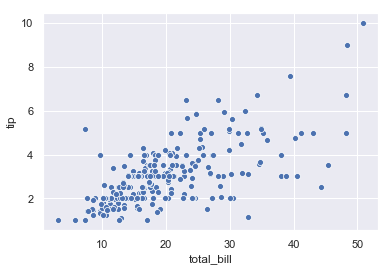

In [146]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)